In [2]:
library(data.table)
#library(lubridate)
library(ggplot2)
library(reshape2)
library(scales)
library(zoo)
library(plyr)
library(readr)
library(stats)
library(quantmod)
library(dplyr)
library(readxl)
library(ggplot2)
library(tidyverse)
library(data.table)
library(lubridate)
library(ggplot2)
library(reshape2)
library(scales)
library(zoo)
library(plyr)
library(readr)
library(lubridate)
library(reshape2)
library(scales)
library(broom)
invisible(1:13) # hides it
library(repr)
library(tibble)
library(lubridate)
library(data.table)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘reshape2’

The following objects are masked from ‘package:data.table’:

    dcast, melt


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘readr’

The following object is masked from ‘package:scales’:

    col_factor

Loading required package: xts
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘xts’

The following objects are masked from ‘package:data.table’:

    first, last

Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘dplyr’

The following objects are masked from ‘package:xts’:

    first, last

The following objects are masked from

# Benchmark current conditions

In [3]:
#import dataset 
dfb<- read.csv("South_UW_energy_benchmarking.csv", header=TRUE)
head(dfb, 10)
colnames(dfb)

OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,...,ThirdLargestPropertyUseTypeGFA,Electricity.kWh.,SteamUse.kBtu.,NaturalGas.therms.,ComplianceStatus,ComplianceIssue,Electricity.kBtu.,NaturalGas.kBtu.,TotalGHGEmissions,GHGEmissionsIntensity
49770,2020,University of Washington Medical Center (UWMC),NonResidential,1625049001,1959 NE PACIFIC ST,,,NA,47.65034,...,NA,44327760,122879824,5128,Compliant,No Issue,151246317,512795,11031.5,6.8
49973,2020,UW - FOEGE BUILDING (genome sciences),NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105,47.65644,...,NA,13031380,60208736,69,Compliant,No Issue,44463069,6909,5234.6,43.7
49974,2020,UW - HEALTH SCIENCES J-WING,NonResidential,1625049001,1705 NE PACIFIC ST,SEATTLE,WA,98195,47.65034,...,NA,4929713,30872392,0,Compliant,No Issue,16820181,0,2652.1,15.5
49975,2020,UW - HEALTH SCIENCES K-WING,NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105,47.65566,...,NA,0,0,0,Compliant,No Issue,NA,NA,NA,NA
49976,2020,UW - HEALTH SCIENCES RR-WING,NonResidential,1625049001,1705 NE PACIFIC ST,SEATTLE,WA,98195,47.65034,...,NA,3524310,42968548,0,Compliant,No Issue,12024946,0,3630.7,25.8
49977,2020,UW - HITCHCOCK HALL,NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105,47.65644,...,NA,1994790,6047404,0,Compliant,No Issue,6806223,0,538.2,4.6
50409,2020,UW- MAGNUSON HEALTH SCIENCES CENTER BB,NonResidential,1625049001,1959 NE PACIFIC ST,SEATTLE,WA,98195,47.65034,...,NA,3122749,0,0,Compliant,No Issue,10654820,0,56.7,0.2
50412,2020,UW- MAGNUSON HEALTH SCIENCES CENTER H,NonResidential,1625049001,1959 NE PACIFIC ST,SEATTLE,WA,98195,47.65034,...,NA,6567483,0,0,Compliant,No Issue,22408252,0,119.2,0.6


[1] "OSEBuildingID"                   "DataYear"                       
 [3] "BuildingName"                    "BuildingType"                   
 [5] "TaxParcelIdentificationNumber"   "Address"                        
 [7] "City"                            "State"                          
 [9] "ZipCode"                         "Latitude"                       
[11] "Longitude"                       "Neighborhood"                   
[13] "CouncilDistrictCode"             "YearBuilt"                      
[15] "NumberofFloors"                  "NumberofBuildings"              
[17] "PropertyGFATotal"                "PropertyGFABuilding.s."         
[19] "PropertyGFAParking"              "ENERGYSTARScore"                
[21] "SiteEUIWN.kBtu.sf."              "SiteEUI.kBtu.sf."               
[23] "SiteEnergyUse.kBtu."             "SiteEnergyUseWN.kBtu."          
[25] "SourceEUIWN.kBtu.sf."            "SourceEUI.kBtu.sf."             
[27] "EPAPropertyType"                 "LargestPropertyUseType"         
[29] "LargestPropertyUseTypeGFA"       "SecondLargestPropertyUseType"   
[31] "SecondLargestPropertyUseTypeGFA" "ThirdLargestPropertyUseType"    
[33] "ThirdLargestPropertyUseTypeGFA"  "Electricity.kWh."               
[35] "SteamUse.kBtu."                  "NaturalGas.therms."             
[37] "ComplianceStatus"                "ComplianceIssue"                
[39] "Electricity.kBtu."               "NaturalGas.kBtu."               
[41] "TotalGHGEmissions"               "GHGEmissionsIntensity"

In [4]:
summary(dfb)

 OSEBuildingID      DataYear                                    BuildingName
 Min.   :49770   Min.   :2020   UW - FOEGE BUILDING (genome sciences) :1    
 1st Qu.:49974   1st Qu.:2020   UW - HEALTH SCIENCES J-WING           :1    
 Median :49976   Median :2020   UW - HEALTH SCIENCES K-WING           :1    
 Mean   :50058   Mean   :2020   UW - HEALTH SCIENCES RR-WING          :1    
 3rd Qu.:50085   3rd Qu.:2020   UW - HITCHCOCK HALL                   :1    
 Max.   :50412   Max.   :2020   UW- MAGNUSON HEALTH SCIENCES CENTER BB:1    
                                (Other)                               :2    
         BuildingType TaxParcelIdentificationNumber               Address 
 NonResidential:8     Min.   :1.625e+09             1705 NE PACIFIC ST:2  
                      1st Qu.:1.625e+09             1959 NE PACIFIC ST:3  
                      Median :1.625e+09             4000 15TH AVE NE  :3  
                      Mean   :1.625e+09                                   
         

Warning message:
“Removed 3 rows containing missing values (geom_bar).”

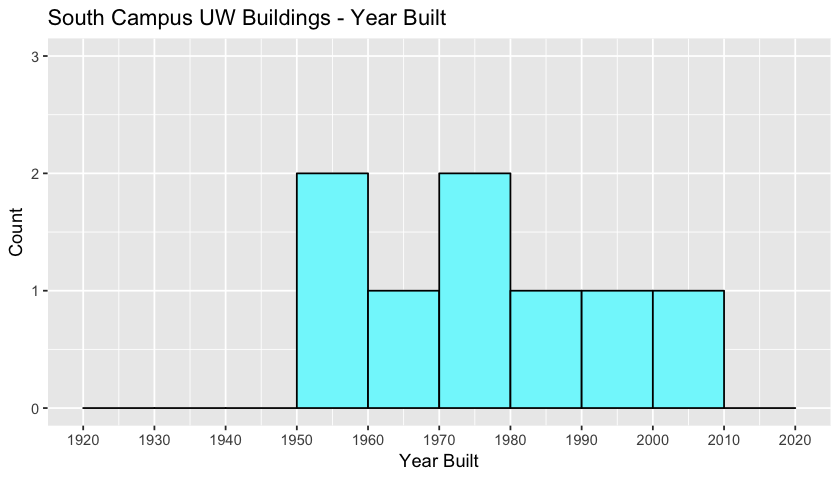

In [5]:
options(repr.plot.width=7, repr.plot.height=4)

ggplot(dfb, aes(x=YearBuilt))+ 
    geom_histogram(fill='#7FF6FC',colour='black', binwidth = 10, breaks = c(1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020)) +
    scale_y_continuous(limits=c(0,3),breaks = c(0,1,2,3))+
    scale_x_continuous(limits=c(1920,2020),breaks = c(1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020))+
    xlab('Year Built') +
    ylab('Count') +
    ggtitle('South Campus UW Buildings - Year Built ')

Warning message:
“Removed 7 rows containing non-finite values (stat_bin).”

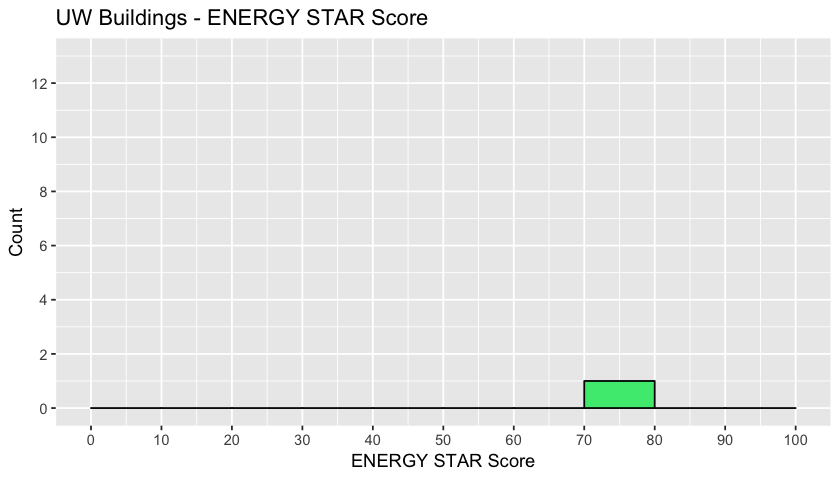

In [6]:
ggplot(dfb, aes(x=ENERGYSTARScore))+ 
    geom_histogram(fill='#47E87F',colour='black', binwidth = 10, breaks = c(0,10,20,30,40,50,60,70,80,90,100)) +
    scale_y_continuous(limits=c(0,13),breaks = c(0,2,4,6,8,10,12))+
    scale_x_continuous(limits=c(0, 100),breaks = c(0,10,20,30,40,50,60,70,80,90,100))+
    xlab('ENERGY STAR Score') +
    ylab('Count') +
    ggtitle('UW Buildings - ENERGY STAR Score ')

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

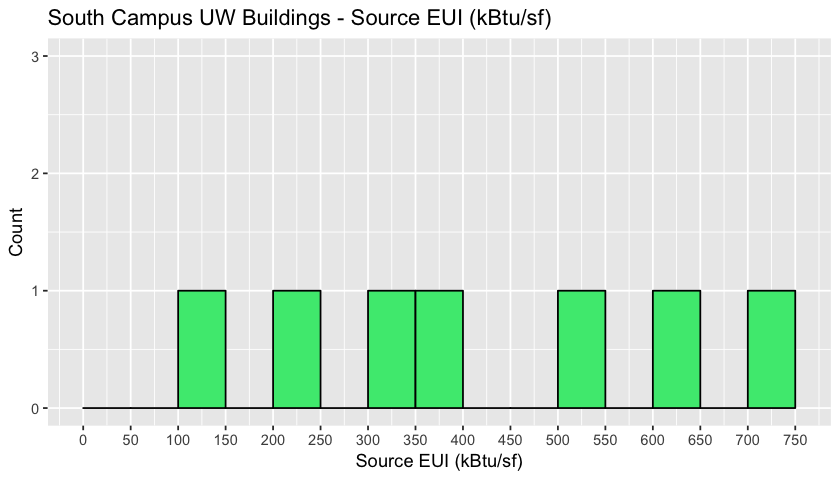

In [7]:
ggplot(dfb, aes(x=SourceEUI.kBtu.sf.))+ 
    geom_histogram(fill='#47E87F',colour='black', binwidth = 50,breaks = c(0,50,100,150,200,250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750))+ #breaks = c(0,10,20,30,40,50,60,70,80,90,100)) +
    scale_y_continuous(limits=c(0,3),breaks = c(0,1,2,3))+
    scale_x_continuous(limits=c(0, 750),breaks = c(0,50,100,150,200,250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750))+
    xlab('Source EUI (kBtu/sf)') +
    ylab('Count') +
    ggtitle('South Campus UW Buildings - Source EUI (kBtu/sf)')

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

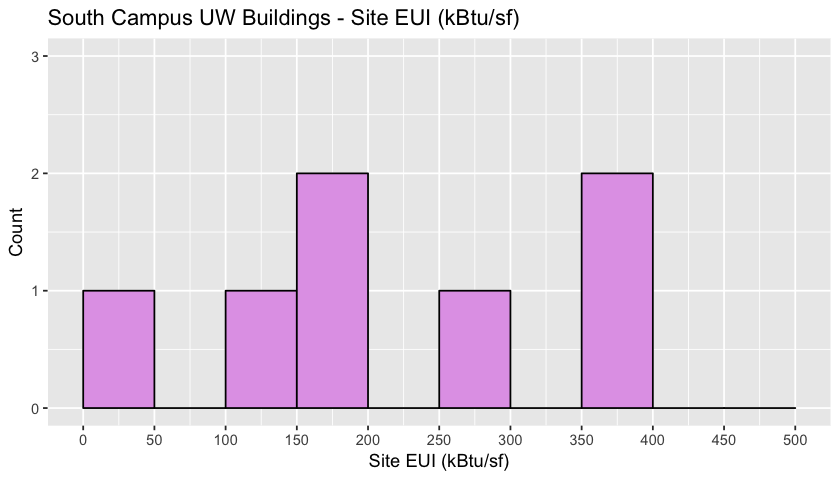

In [8]:
ggplot(dfb, aes(x=SiteEUI.kBtu.sf.))+ 
    geom_histogram(fill='#E2A4E8',colour='black', binwidth = 50,breaks = c(0,50,100,150,200,250, 300, 350, 400, 450, 500))+ #breaks = c(0,10,20,30,40,50,60,70,80,90,100)) +
    scale_y_continuous(limits=c(0,3),breaks = c(0,1,2, 3))+
    scale_x_continuous(limits=c(0, 500),breaks = c(0,50,100,150,200,250, 300, 350, 400, 450, 500))+
    xlab('Site EUI (kBtu/sf)') +
    ylab('Count') +
    ggtitle('South Campus UW Buildings - Site EUI (kBtu/sf)')




# This file will plot UMI output in Cute TimeSeries'

In [9]:
library(tidyr)

In [10]:
#import dataset 
#df<- read.csv("Rhino_output/ALL.csv", header=TRUE)
df<- read.csv("UMI_results_w_archetypes/2023 UPDATED.csv", header=TRUE)
#head(df)
#colnames(df)
data_long <- gather(df, month, Value, X1:X12)
#head(data_long)
df2= spread(data_long, key = Metric, value = Value)
df2$month<-gsub("X","",as.character(df2$month))
df2$month <- as.integer(df2$month) 
head(df2)
colnames(df2)
b20= df2 %>%
    filter(Building.Name=="UW MEDICAL CENTER") 


b20_2 = subset(b20, select=-c(`SDL/Total Operational Energy`))

#head(b20_2)


dfb20 <- gather(b20_2, Type, Value, `SDL/Cooling`:`SDL/Window Radiation`)
dfb20$Type <-gsub("SDL/","",as.character(dfb20$Type))
head(dfb20)


Building.Id,Building.Name,Units,Resolution,month,SDL/Cooling,SDL/Domestic Hot Water,SDL/Equipment,SDL/Heating,SDL/Lighting,SDL/Total Operational Energy,SDL/Window Radiation
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,1,0,16758.77,29650.55,6848.7340,28907.88,82165.94,10336.729
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,10,0,16758.77,29650.55,109.9052,28030.82,74550.05,19730.849
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,11,0,16586.00,29401.39,1057.2977,28517.70,75562.39,9879.673
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,12,0,16240.46,28653.90,2844.0868,28537.25,76275.69,9883.866
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,2,0,15203.83,26909.75,1777.8347,25587.42,69478.83,23062.820
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,3,0,17277.08,30647.21,644.1109,28577.92,77146.32,23681.255


[1] "Building.Id"                  "Building.Name"               
 [3] "Units"                        "Resolution"                  
 [5] "month"                        "SDL/Cooling"                 
 [7] "SDL/Domestic Hot Water"       "SDL/Equipment"               
 [9] "SDL/Heating"                  "SDL/Lighting"                
[11] "SDL/Total Operational Energy" "SDL/Window Radiation"

Building.Id,Building.Name,Units,Resolution,month,Type,Value
f4b56f76-09c3-4c24-8d09-c7d58a74e04d,UW MEDICAL CENTER,kWh,Monthly,1,Cooling,0
f4b56f76-09c3-4c24-8d09-c7d58a74e04d,UW MEDICAL CENTER,kWh,Monthly,10,Cooling,0
f4b56f76-09c3-4c24-8d09-c7d58a74e04d,UW MEDICAL CENTER,kWh,Monthly,11,Cooling,0
f4b56f76-09c3-4c24-8d09-c7d58a74e04d,UW MEDICAL CENTER,kWh,Monthly,12,Cooling,0
f4b56f76-09c3-4c24-8d09-c7d58a74e04d,UW MEDICAL CENTER,kWh,Monthly,2,Cooling,0
f4b56f76-09c3-4c24-8d09-c7d58a74e04d,UW MEDICAL CENTER,kWh,Monthly,3,Cooling,0


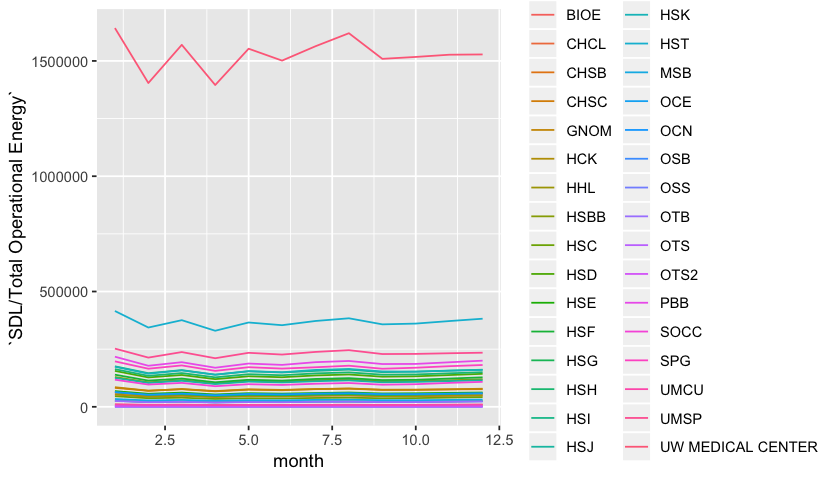

In [11]:
options(repr.plot.width=7, repr.plot.height=4)

ggplot(df2, aes(x=month, y=`SDL/Total Operational Energy`)) +
  geom_line(aes(color= `Building.Name`))




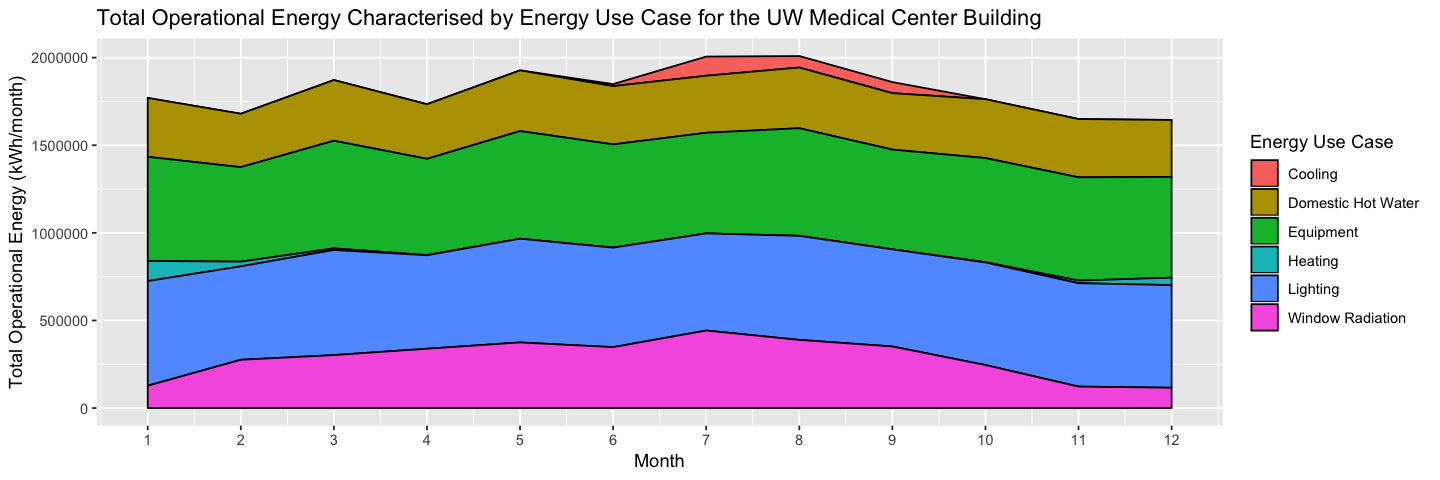

In [12]:
options(repr.plot.width=12, repr.plot.height=4)

ggplot(dfb20, aes(x=month, y= Value, fill= Type)) + 
    geom_area(color= "black",)+
    scale_x_continuous(limits=c(1,12),breaks = c(1,2,3,4,5,6,7,8,9,10,11,12))+
    ylab('Total Operational Energy (kWh/month)') +
    xlab('Month') +
    guides(fill=guide_legend(title="Energy Use Case"))+
    ggtitle('Total Operational Energy Characterised by Energy Use Case for the UW Medical Center Building')

ggsave('big_building.png', width = 10, height = 6)


In [13]:
#import dataset 
#df1<- read.csv("Rhino_output/SSP_5_2050.csv", header=TRUE)
df1<- read.csv("UMI_results_w_archetypes/2050 AGGRESSIVE UPDATED.csv", header=TRUE)
data_long1 <- gather(df1, month, Value, X1:X12)
#head(data_long1)
df21= spread(data_long1, key = Metric, value = Value)
df21$month<-gsub("X","",as.character(df21$month))
df21$month <- as.integer(df21$month) 
head(df21)
colnames(df21)
b201= df21 %>%
    filter(Building.Name=="UW MEDICAL CENTER") 


b20_21 = subset(b201, select=-c(`SDL/Total Operational Energy`))

#head(b20_21)


dfb201 <- gather(b20_21, Type, Value, `SDL/Cooling`:`SDL/Window Radiation`)
dfb201$Type <-gsub("SDL/","",as.character(dfb20$Type))
head(dfb201)

Building.Id,Building.Name,Units,Resolution,month,SDL/Cooling,SDL/Domestic Hot Water,SDL/Equipment,SDL/Heating,SDL/Lighting,SDL/Total Operational Energy,SDL/Window Radiation
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,1,0,16758.77,29650.55,988.329988,29361.04,76758.70,5356.557
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,10,0,16758.77,29650.55,9.081595,28095.46,74513.87,21160.935
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,11,0,16586.00,29401.39,125.877380,28827.13,74940.39,6798.837
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,12,0,16240.46,28653.90,123.342806,28918.04,73935.74,5031.367
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,2,0,15203.83,26909.75,122.856152,25690.00,67926.43,18115.505
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,3,0,17277.08,30647.21,62.268009,28742.50,76729.06,19351.731


[1] "Building.Id"                  "Building.Name"               
 [3] "Units"                        "Resolution"                  
 [5] "month"                        "SDL/Cooling"                 
 [7] "SDL/Domestic Hot Water"       "SDL/Equipment"               
 [9] "SDL/Heating"                  "SDL/Lighting"                
[11] "SDL/Total Operational Energy" "SDL/Window Radiation"

Building.Id,Building.Name,Units,Resolution,month,Type,Value
f4b56f76-09c3-4c24-8d09-c7d58a74e04d,UW MEDICAL CENTER,kWh,Monthly,1,Cooling,0
f4b56f76-09c3-4c24-8d09-c7d58a74e04d,UW MEDICAL CENTER,kWh,Monthly,10,Cooling,0
f4b56f76-09c3-4c24-8d09-c7d58a74e04d,UW MEDICAL CENTER,kWh,Monthly,11,Cooling,0
f4b56f76-09c3-4c24-8d09-c7d58a74e04d,UW MEDICAL CENTER,kWh,Monthly,12,Cooling,0
f4b56f76-09c3-4c24-8d09-c7d58a74e04d,UW MEDICAL CENTER,kWh,Monthly,2,Cooling,0
f4b56f76-09c3-4c24-8d09-c7d58a74e04d,UW MEDICAL CENTER,kWh,Monthly,3,Cooling,0


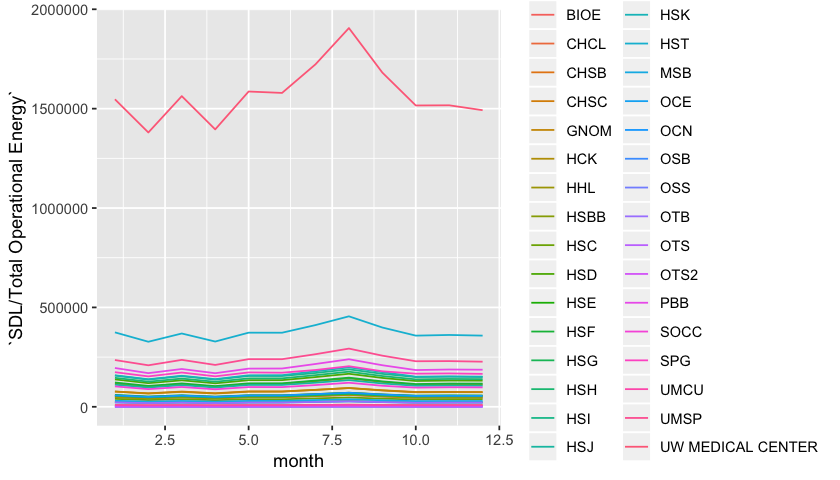

In [14]:
options(repr.plot.width=7, repr.plot.height=4)

ggplot(df21, aes(x=month, y=`SDL/Total Operational Energy`)) +
  geom_line(aes(color= `Building.Name`))


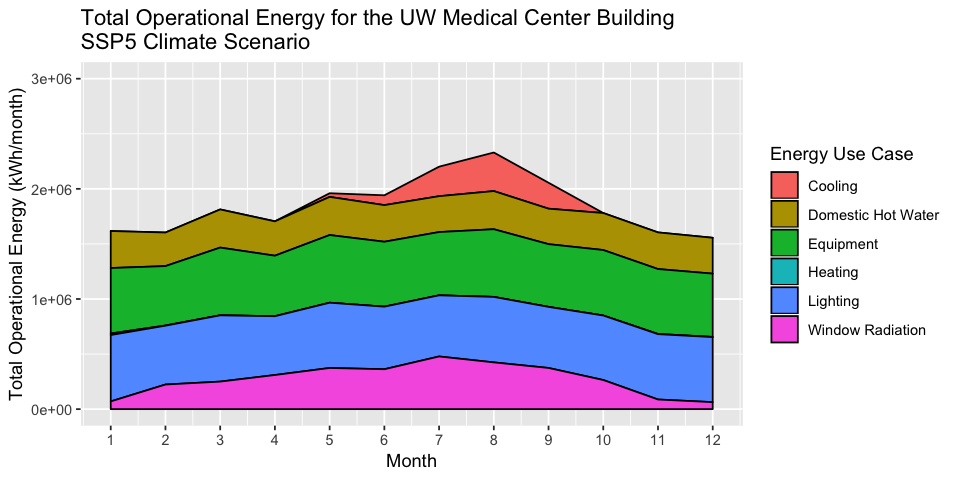

In [15]:
options(repr.plot.width=8, repr.plot.height=4)

ggplot(dfb201, aes(x=month, y= Value, fill= Type)) + 
    geom_area(color= "black",)+
    scale_x_continuous(limits=c(1,12),breaks = c(1,2,3,4,5,6,7,8,9,10,11,12))+
      scale_y_continuous(limits=c(0,3000000), breaks= c(0,1000000, 2000000, 3000000))+
    ylab('Total Operational Energy (kWh/month)') +
    xlab('Month') +
    guides(fill=guide_legend(title="Energy Use Case"))+
    ggtitle('Total Operational Energy for the UW Medical Center Building\nSSP5 Climate Scenario')

ggsave('big_building_SSP5.png', width = 8, height = 4)

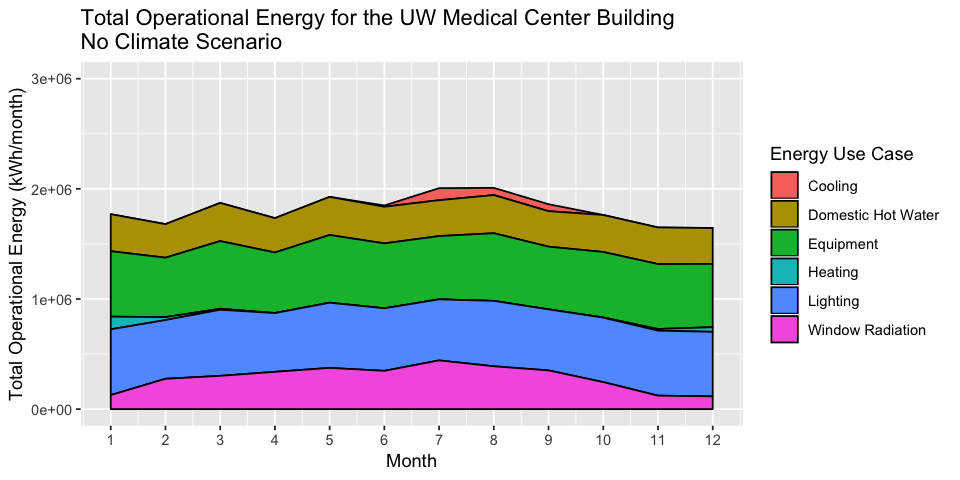

In [16]:
options(repr.plot.width=8, repr.plot.height=4)

ggplot(dfb20, aes(x=month, y= Value, fill= Type)) + 
    geom_area(color= "black",)+
    scale_x_continuous(limits=c(1,12),breaks = c(1,2,3,4,5,6,7,8,9,10,11,12))+
   scale_y_continuous(limits=c(0,3000000), breaks= c(0,1000000, 2000000, 3000000))+
    ylab('Total Operational Energy (kWh/month)') +
    xlab('Month') +
    guides(fill=guide_legend(title="Energy Use Case"))+
    ggtitle('Total Operational Energy for the UW Medical Center Building\nNo Climate Scenario')

ggsave('big_building.png', width = 8, height = 4)

In [17]:
#dfc<- read.csv("Rhino_output/SSP_1_2050.csv", header=TRUE)
dfc<- read.csv("UMI_results_w_archetypes/2050 CONSERVATIVE UPDATED.csv", header=TRUE)
#head(dfc)
data_longc <- gather(dfc, month, Value, X1:X12)
#head(data_longc)
df2c= spread(data_longc, key = Metric, value = Value)
df2c$month<-gsub("X","",as.character(df2c$month))
df2c$month <- as.integer(df2c$month) 
SSP1 <- subset(df2c, select=c(`SDL/Total Operational Energy`))
#head(df2c)
#colnames(df2c)
b20c= df2c %>%
    filter(Building.Name=="UW MEDICAL CENTER") 


b20_2c = subset(b20c, select=-c(`SDL/Total Operational Energy`))

#head(b20_2c)


dfb20c <- gather(b20_2c, Type, Value, `SDL/Cooling`:`SDL/Window Radiation`)
dfb20c$Type <-gsub("SDL/","",as.character(dfb20$Type))
head(dfb20c)


Building.Id,Building.Name,Units,Resolution,month,Type,Value
f4b56f76-09c3-4c24-8d09-c7d58a74e04d,UW MEDICAL CENTER,kWh,Monthly,1,Cooling,0
f4b56f76-09c3-4c24-8d09-c7d58a74e04d,UW MEDICAL CENTER,kWh,Monthly,10,Cooling,0
f4b56f76-09c3-4c24-8d09-c7d58a74e04d,UW MEDICAL CENTER,kWh,Monthly,11,Cooling,0
f4b56f76-09c3-4c24-8d09-c7d58a74e04d,UW MEDICAL CENTER,kWh,Monthly,12,Cooling,0
f4b56f76-09c3-4c24-8d09-c7d58a74e04d,UW MEDICAL CENTER,kWh,Monthly,2,Cooling,0
f4b56f76-09c3-4c24-8d09-c7d58a74e04d,UW MEDICAL CENTER,kWh,Monthly,3,Cooling,0


In [18]:
SSP1 <- subset(df2c, select=c(`SDL/Total Operational Energy`,Building.Name, month  ))

head(SSP1)

SDL/Total Operational Energy,Building.Name,month
77382.37,CHSC,1
74553.81,CHSC,10
74827.12,CHSC,11
73833.38,CHSC,12
68373.09,CHSC,2
76932.51,CHSC,3


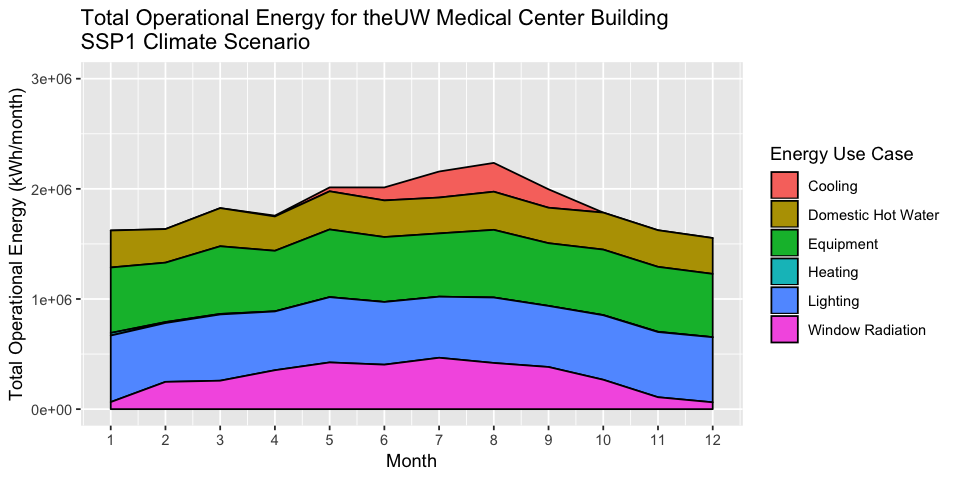

In [19]:
options(repr.plot.width=8, repr.plot.height=4)

ggplot(dfb20c, aes(x=month, y= Value, fill= Type)) + 
    geom_area(color= "black",)+
    scale_x_continuous(limits=c(1,12),breaks = c(1,2,3,4,5,6,7,8,9,10,11,12))+
    scale_y_continuous(limits=c(0,3000000), breaks= c(0,1000000, 2000000, 3000000))+
    ylab('Total Operational Energy (kWh/month)') +
    xlab('Month') +
    guides(fill=guide_legend(title="Energy Use Case"))+
    ggtitle('Total Operational Energy for theUW Medical Center Building\nSSP1 Climate Scenario')

ggsave('big_building_SSP1.png', width = 8, height = 4)

In [20]:
B20_all = subset(b20, select=c(`month`, `SDL/Total Operational Energy`))
B20_all$SSP= 'Original EPW'

B20_all
sum(B20_all$`SDL/Total Operational Energy`)

month,SDL/Total Operational Energy,SSP
1,1642514,Original EPW
10,1517347,Original EPW
11,1526954,Original EPW
12,1528160,Original EPW
2,1404206,Original EPW
3,1569830,Original EPW
4,1395528,Original EPW
5,1553004,Original EPW
6,1501402,Original EPW
7,1563661,Original EPW


[1] 18331826

In [21]:
B201_all = subset(b201, select=c(`month`, `SDL/Total Operational Energy`))
B201_all$SSP= 'SSP5'
B201_all

sum(B201_all$`SDL/Total Operational Energy`)

month,SDL/Total Operational Energy,SSP
1,1547113,SSP5
10,1516069,SSP5
11,1516907,SSP5
12,1492243,SSP5
2,1380131,SSP5
3,1563007,SSP5
4,1395695,SSP5
5,1586271,SSP5
6,1579175,SSP5
7,1723058,SSP5


[1] 18886652

In [22]:
B20c_all = subset(b20c, select=c(`month`, `SDL/Total Operational Energy`))
B20c_all$SSP= 'SSP1'
B20c_all

sum(B20c_all$`SDL/Total Operational Energy`)

month,SDL/Total Operational Energy,SSP
1,1557670,SSP1
10,1517626,SSP1
11,1516200,SSP1
12,1491408,SSP1
2,1387005,SSP1
3,1566942,SSP1
4,1403478,SSP1
5,1589263,SSP1
6,1608861,SSP1
7,1690894,SSP1


[1] 18759080

In [23]:
everything <-rbind(B20_all, B20c_all)
everything2= rbind(everything, B201_all)
head(everything2)

month,SDL/Total Operational Energy,SSP
1,1642514,Original EPW
10,1517347,Original EPW
11,1526954,Original EPW
12,1528160,Original EPW
2,1404206,Original EPW
3,1569830,Original EPW


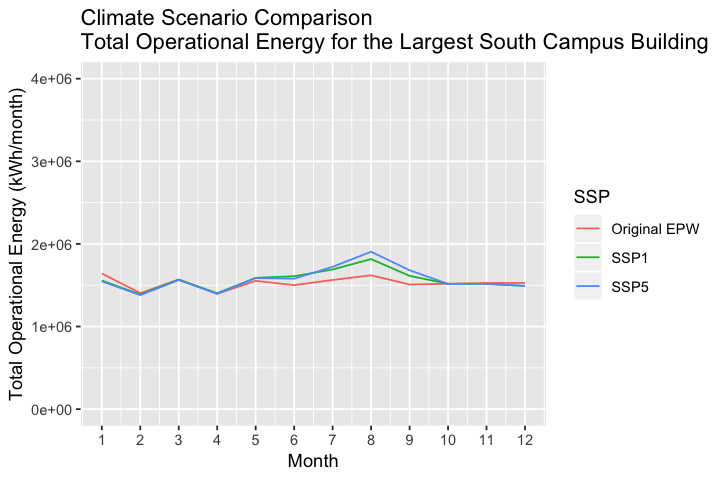

In [24]:
options(repr.plot.width=6, repr.plot.height=4)

ggplot(everything2, aes(x=month, y=`SDL/Total Operational Energy`)) +
  geom_line(aes(color= SSP))+
  scale_x_continuous(limits=c(1,12),breaks = c(1,2,3,4,5,6,7,8,9,10,11,12))+ 
    ylab('Total Operational Energy (kWh/month)') +
    xlab('Month') +
    guides(fill=guide_legend(title="Energy Use Case"))+
    ggtitle('Climate Scenario Comparison\nTotal Operational Energy for the Largest South Campus Building')+
    scale_y_continuous(limits=c(0,4000000), breaks= c(0,1000000, 2000000, 3000000, 4000000))





In [25]:
everything3 <- everything2 %>% group_by(SSP) %>% 
  summarise(sum_energy=sum(`SDL/Total Operational Energy`)) %>%
  as.data.frame()
everything3

SSP,sum_energy
Original EPW,18331826
SSP1,18759080
SSP5,18886652


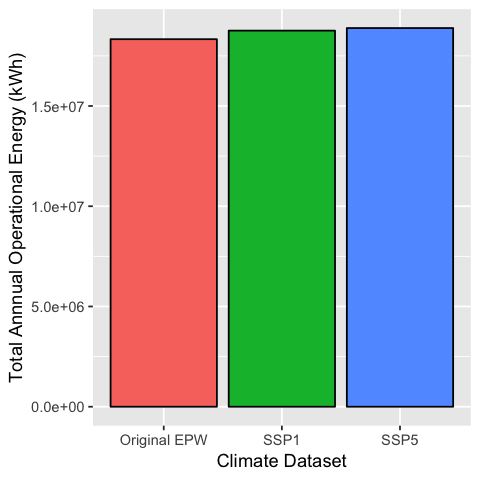

In [26]:
options(repr.plot.width=4, repr.plot.height=4)

ggplot(data=everything3, aes(x=SSP, y=sum_energy, fill=SSP)) +
    geom_bar(colour="black", stat="identity") +
    guides(fill=FALSE)+
    ylab('Total Annnual Operational Energy (kWh)') +
    xlab('Climate Dataset') 

In [27]:
SSP1 <- subset(df2c, select=c(`SDL/Total Operational Energy`,Building.Name, month  ))
SSP1$SSP= 'SSP1'
head(SSP1)


SDL/Total Operational Energy,Building.Name,month,SSP
77382.37,CHSC,1,SSP1
74553.81,CHSC,10,SSP1
74827.12,CHSC,11,SSP1
73833.38,CHSC,12,SSP1
68373.09,CHSC,2,SSP1
76932.51,CHSC,3,SSP1


In [28]:
SSP5 <- subset(df21, select=c(`SDL/Total Operational Energy`,Building.Name, month  ))
SSP5$SSP= 'SSP5'
head(SSP5)

SDL/Total Operational Energy,Building.Name,month,SSP
76758.70,CHSC,1,SSP5
74513.87,CHSC,10,SSP5
74940.39,CHSC,11,SSP5
73935.74,CHSC,12,SSP5
67926.43,CHSC,2,SSP5
76729.06,CHSC,3,SSP5


In [29]:
orig <- subset(df2, select=c(`SDL/Total Operational Energy`,Building.Name, month  ))
orig$SSP= 'Original EPW'
head(orig)

SDL/Total Operational Energy,Building.Name,month,SSP
82165.94,CHSC,1,Original EPW
74550.05,CHSC,10,Original EPW
75562.39,CHSC,11,Original EPW
76275.69,CHSC,12,Original EPW
69478.83,CHSC,2,Original EPW
77146.32,CHSC,3,Original EPW


In [30]:
all <-rbind(orig, SSP1)
all2= rbind(all, SSP5)
head(all2)

SDL/Total Operational Energy,Building.Name,month,SSP
82165.94,CHSC,1,Original EPW
74550.05,CHSC,10,Original EPW
75562.39,CHSC,11,Original EPW
76275.69,CHSC,12,Original EPW
69478.83,CHSC,2,Original EPW
77146.32,CHSC,3,Original EPW


In [31]:
all3 <- all2 %>% group_by(SSP) %>% 
  summarise(sum_energy=sum(`SDL/Total Operational Energy`)) %>%
  as.data.frame()
all3

SSP,sum_energy
Original EPW,49801925
SSP1,50501302
SSP5,50773805


In [32]:
all3 <- all2 %>% group_by(SSP) %>% 
  summarise(sum_energy=sum(`SDL/Total Operational Energy`)) %>%
  as.data.frame()
all3




SSP,sum_energy
Original EPW,49801925
SSP1,50501302
SSP5,50773805


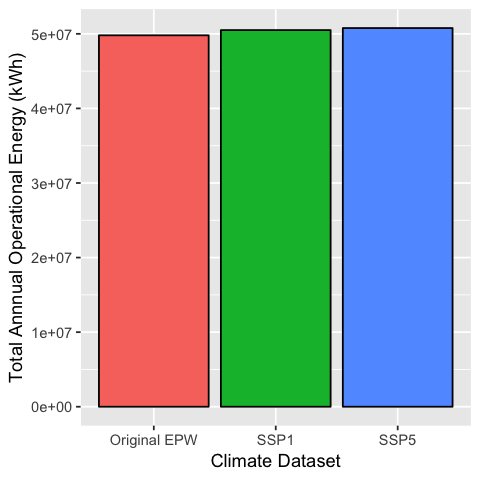

In [33]:
ggplot(data=all3, aes(x=SSP, y=sum_energy, fill=SSP)) +
    geom_bar(colour="black", stat="identity") +
    guides(fill=FALSE)+
    ylab('Total Annnual Operational Energy (kWh)') +
    xlab('Climate Dataset') 

In [34]:
allmonth <- all2 %>% group_by(SSP, month) %>% 
  summarise(sum_energy=sum(`SDL/Total Operational Energy`)) %>%
  as.data.frame()
head(allmonth)

SSP,month,sum_energy
Original EPW,1,4620363
Original EPW,2,3863121
Original EPW,3,4249661
Original EPW,4,3740208
Original EPW,5,4146958
Original EPW,6,4012605


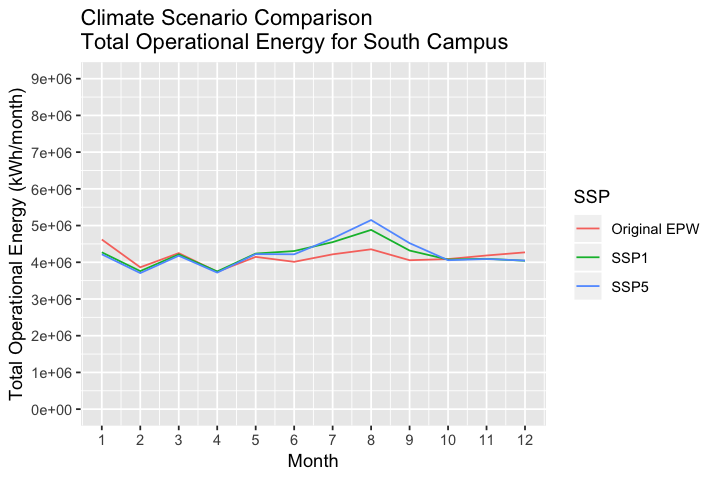

In [35]:
options(repr.plot.width=6, repr.plot.height=4)

ggplot(allmonth, aes(x=month, y=sum_energy)) +
  geom_line(aes(color= SSP))+
  scale_x_continuous(limits=c(1,12),breaks = c(1,2,3,4,5,6,7,8,9,10,11,12))+ 
    ylab('Total Operational Energy (kWh/month)') +
    xlab('Month') +
    guides(fill=guide_legend(title="Energy Use Case"))+
    ggtitle('Climate Scenario Comparison\nTotal Operational Energy for South Campus')+
    scale_y_continuous(limits=c(0,9000000), breaks= c(0,1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000))



In [36]:
SSP1_all <- subset(df2c, select=-c(`SDL/Total Operational Energy`))

#head(SSP1_all)
SSP1_all <- gather(SSP1_all, Type, Value, `SDL/Cooling`:`SDL/Window Radiation`)
SSP1_all$Type <-gsub("SDL/","",as.character(SSP1_all$Type))
SSP1_all$SSP ='SSP1 in 2050'
head(SSP1_all)

Building.Id,Building.Name,Units,Resolution,month,Type,Value,SSP
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,1,Cooling,0,SSP1 in 2050
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,10,Cooling,0,SSP1 in 2050
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,11,Cooling,0,SSP1 in 2050
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,12,Cooling,0,SSP1 in 2050
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,2,Cooling,0,SSP1 in 2050
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,3,Cooling,0,SSP1 in 2050


In [37]:
SSP5_all <- subset(df21, select=-c(`SDL/Total Operational Energy`))

#head(SSP1_all)
SSP5_all <- gather(SSP5_all, Type, Value, `SDL/Cooling`:`SDL/Window Radiation`)
SSP5_all$Type <-gsub("SDL/","",as.character(SSP5_all$Type))

SSP5_all$SSP ='SSP5 in 2050'

head(SSP5_all)


Building.Id,Building.Name,Units,Resolution,month,Type,Value,SSP
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,1,Cooling,0,SSP5 in 2050
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,10,Cooling,0,SSP5 in 2050
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,11,Cooling,0,SSP5 in 2050
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,12,Cooling,0,SSP5 in 2050
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,2,Cooling,0,SSP5 in 2050
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,3,Cooling,0,SSP5 in 2050


In [38]:
orig_all <- subset(df2, select=-c(`SDL/Total Operational Energy`))

#head(SSP1_all)
orig_all <- gather(orig_all, Type, Value, `SDL/Cooling`:`SDL/Window Radiation`)
orig_all$Type <-gsub("SDL/","",as.character(orig_all$Type))
orig_all$SSP ='Current TMY3'

head(orig_all)



Building.Id,Building.Name,Units,Resolution,month,Type,Value,SSP
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,1,Cooling,0,Current TMY3
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,10,Cooling,0,Current TMY3
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,11,Cooling,0,Current TMY3
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,12,Cooling,0,Current TMY3
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,2,Cooling,0,Current TMY3
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,3,Cooling,0,Current TMY3


In [39]:
unique(orig_all$Building.Name)

[1] CHSC              PBB               GNOM              HST              
 [5] BIOE              MSB               HSE               HSC              
 [9] OTS               HCK               OSB               HSBB             
[13] OCN               OTB               OTS2              HSI              
[17] HSF               HSH               UMSP              SOCC             
[21] HSJ               HHL               OSS               HSG              
[25] HSK               CHCL              SPG               HSD              
[29] OCE               CHSB              UW MEDICAL CENTER UMCU             
32 Levels: BIOE CHCL CHSB CHSC GNOM HCK HHL HSBB HSC HSD HSE HSF HSG ... UW MEDICAL CENTER

In [40]:
unique(SSP1_all$Building.Name)

[1] CHSC              PBB               GNOM              HST              
 [5] BIOE              MSB               HSE               HSC              
 [9] OTS               HCK               OSB               HSBB             
[13] OCN               OTB               OTS2              HSI              
[17] HSF               HSH               UMSP              SOCC             
[21] HSJ               HHL               OSS               HSG              
[25] HSK               CHCL              SPG               HSD              
[29] OCE               CHSB              UW MEDICAL CENTER UMCU             
32 Levels: BIOE CHCL CHSB CHSC GNOM HCK HHL HSBB HSC HSD HSE HSF HSG ... UW MEDICAL CENTER

In [41]:
all_use <-rbind(orig_all, SSP1_all)
all_use2= rbind(all_use, SSP5_all)
head(all_use2)

all_use3= subset(all_use2, select = -c(Building.Id,Resolution ) )

all_use3

#all_use3.tocsv('Building_energy_by_month.csv')

Building.Id,Building.Name,Units,Resolution,month,Type,Value,SSP
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,1,Cooling,0,Current TMY3
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,10,Cooling,0,Current TMY3
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,11,Cooling,0,Current TMY3
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,12,Cooling,0,Current TMY3
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,2,Cooling,0,Current TMY3
02699806-fbb9-4003-84e3-45083cedb250,CHSC,kWh,Monthly,3,Cooling,0,Current TMY3


Building.Name,Units,month,Type,Value,SSP
CHSC,kWh,1,Cooling,0.000000,Current TMY3
CHSC,kWh,10,Cooling,0.000000,Current TMY3
CHSC,kWh,11,Cooling,0.000000,Current TMY3
CHSC,kWh,12,Cooling,0.000000,Current TMY3
CHSC,kWh,2,Cooling,0.000000,Current TMY3
CHSC,kWh,3,Cooling,0.000000,Current TMY3
CHSC,kWh,4,Cooling,2.795254,Current TMY3
CHSC,kWh,5,Cooling,15.047279,Current TMY3
CHSC,kWh,6,Cooling,636.156634,Current TMY3
CHSC,kWh,7,Cooling,6002.160154,Current TMY3


In [42]:
#write.csv(all_use3, 'Building_energy_by_month.csv', row.names=FALSE)

In [48]:
agg_tbl <- all_use2 %>% group_by(SSP, Type,Building.Name ) %>% 
  summarise(total_energy=sum(Value))
agg_tbl


agg_tb2 <- all_use2 %>% group_by(SSP, Type ) %>% 
  summarise(total_energy=sum(Value))
agg_tb2

SSP,Type,Building.Name,total_energy
Current TMY3,Cooling,BIOE,9606.7265
Current TMY3,Cooling,CHCL,11431.8569
Current TMY3,Cooling,CHSB,2233.9730
Current TMY3,Cooling,CHSC,13786.4847
Current TMY3,Cooling,GNOM,15500.0844
Current TMY3,Cooling,HCK,9710.3784
Current TMY3,Cooling,HHL,6028.2076
Current TMY3,Cooling,HSBB,23543.4459
Current TMY3,Cooling,HSC,7655.9428
Current TMY3,Cooling,HSD,26768.2515


SSP,Type,total_energy
Current TMY3,Cooling,751647.6
Current TMY3,Domestic Hot Water,10834379.1
Current TMY3,Equipment,19505740.5
Current TMY3,Heating,1095231.6
Current TMY3,Lighting,17614925.8
Current TMY3,Window Radiation,14825595.3
SSP1 in 2050,Cooling,2326083.5
SSP1 in 2050,Domestic Hot Water,10834379.1
SSP1 in 2050,Equipment,19505740.5
SSP1 in 2050,Heating,273554.2


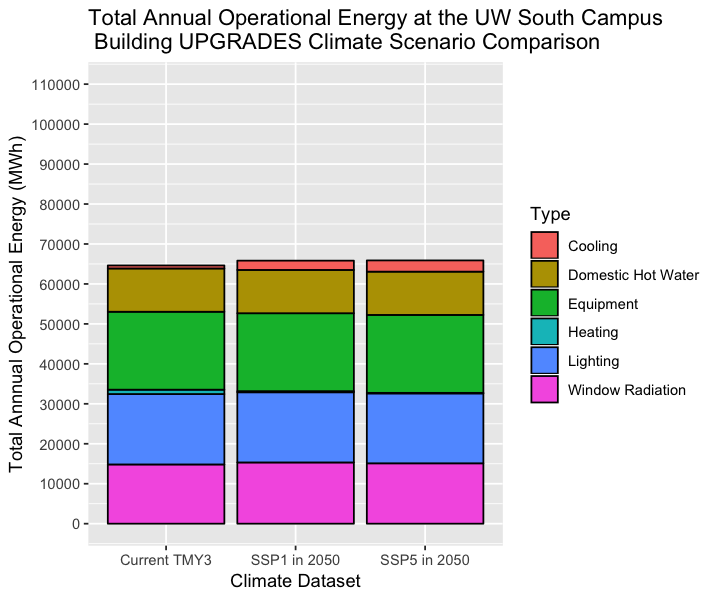

In [52]:
options(repr.plot.width=6, repr.plot.height=5)

ggplot(data=agg_tb2, aes(x=SSP, y=total_energy/1000, fill=Type)) +
    geom_bar(colour="black", stat="identity") +
    #guides(fill=FALSE)+
    ylab('Total Annnual Operational Energy (MWh)') +
    xlab('Climate Dataset') +
    scale_y_continuous(limits=c(0,110000), breaks= c(0,10000, 20000, 30000, 40000,50000, 60000, 70000, 80000, 90000, 100000, 110000))+
 ggtitle('Total Annual Operational Energy at the UW South Campus\n Building UPGRADES Climate Scenario Comparison')


In [45]:
agg_tb2 <- all_use2 %>% group_by(SSP) %>% 
  summarise(total_energy=sum(Value))
agg_tb2

agg_tb2$inc= ((agg_tb2$total_energy- 64627520)/ 64627520) *100


agg_tb2

SSP,total_energy
Current TMY3,64627520
SSP1 in 2050,65828756
SSP5 in 2050,65884950


SSP,total_energy,inc
Current TMY3,64627520,-1.476182e-07
SSP1 in 2050,65828756,1.858707e+00
SSP5 in 2050,65884950,1.945658e+00
